In [ ]:
%pip install numpy, matplotlib, opencv-python, jupyterlab

from IPython.core.display import HTML
import pathlib
styles_path = pathlib.Path(pathlib.Path().absolute(), "style", "style.css")
styles = open(styles_path, "r").read()
HTML(f"<style>{styles}</style>")

# 2.0 Image Processing II

### Contents

1.1  \
1.1.1  \
1.1.2  \
1.1.3 

1.2 


&nbsp;

$\large{\text{2.1 Filters as Templates}} \\ \large{\text{2.1.1 Template Matching}} $

---

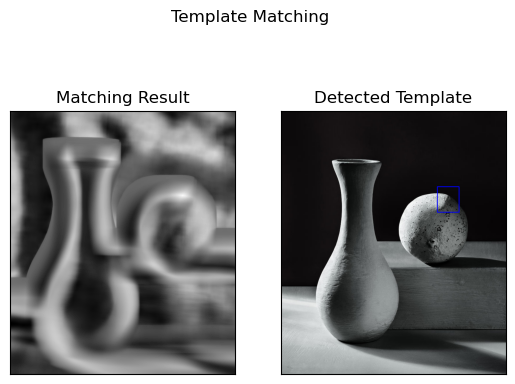

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def find_template(template_path, target_path):
    # Load images
    template = cv2.imread(template_path, 0)
    target = cv2.imread(target_path, 0)

    # Get dimensions of the template
    w, h = template.shape[::-1]

    # Perform template matching
    res = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Get the top-left corner of the matched area
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    # Draw rectangle around the matched region
    matched_img = cv2.imread(target_path)
    cv2.rectangle(matched_img, top_left, bottom_right, 255, 2)

    # Display results
    plt.subplot(121), plt.imshow(res, cmap='gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.title('Detected Template'), plt.xticks([]), plt.yticks([])
    plt.suptitle('Template Matching')
    plt.show()

template_path = 'img/gaussian_original_template.jpg'
target_path = 'img/gaussian_original.jpg'
find_template(template_path, target_path)




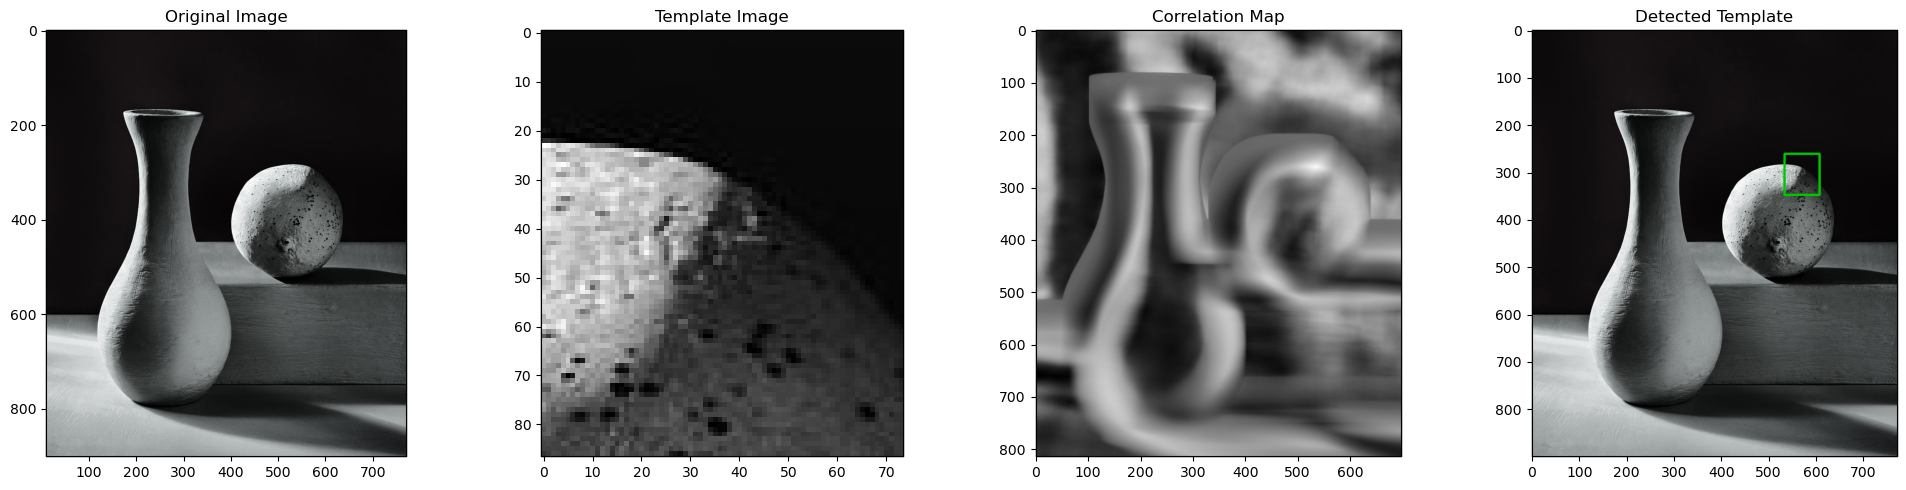

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_template(template_path, target_path):
    template = cv2.imread(template_path, 0)
    target = cv2.imread(target_path, 0)
    original_target = cv2.imread(target_path)  # Load original target image

    res = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    w, h = template.shape[::-1]
    bottom_right = (top_left[0] + w, top_left[1] + h)

    matched_img = original_target.copy()
    cv2.rectangle(matched_img, top_left, bottom_right, (0, 200, 0), 4)  # Green rectangle

    return original_target, template, res, matched_img

def display_images(original_image, template_image, correlation_map, detected_image):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))


    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].set_frame_on(True) 
    axes[0].set_xlim(10, original_image.shape[1]) 
    axes[0].set_ylim(original_image.shape[0])  
    axes[0].patch.set_edgecolor('black')  
    axes[0].patch.set_linewidth(1) 


    axes[1].imshow(template_image, cmap='gray')
    axes[1].set_title('Template Image')
    axes[1].set_frame_on(True)
    axes[1].patch.set_edgecolor('black')
    axes[1].patch.set_linewidth(1)


    axes[2].imshow(correlation_map, cmap='gray')
    axes[2].set_title('Correlation Map')
    axes[2].set_frame_on(True)
    axes[2].patch.set_edgecolor('black')
    axes[2].patch.set_linewidth(1)


    axes[3].imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
    axes[3].set_title('Detected Template')
    axes[3].set_frame_on(True)
    axes[3].patch.set_edgecolor('black')
    axes[3].patch.set_linewidth(1)

    plt.tight_layout()
    plt.show()

template_path = 'img/gaussian_original_template.jpg'
target_path = 'img/gaussian_original.jpg'

# Perform template matching and get images
original_image, template_image, correlation_map, detected_image = find_template(template_path, target_path)

display_images(original_image, template_image, correlation_map, detected_image)


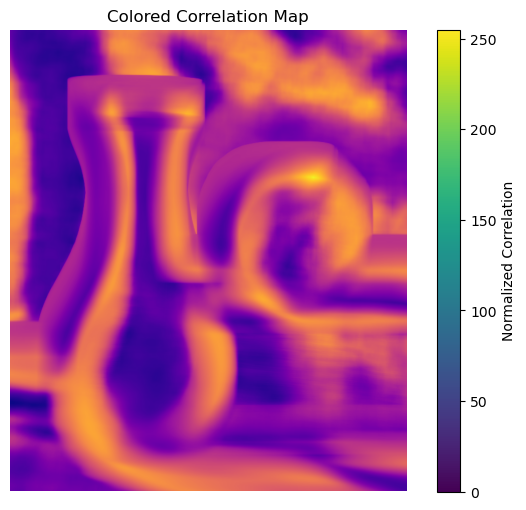

In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def visualize_correlation_map(correlation_map):
    # Normalize the correlation map to the range [0, 1]
    normalized_map = cv2.normalize(correlation_map, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

    # Apply a color map (e.g., 'plasma') to enhance visualization
    colormap = plt.get_cmap('plasma')  # You can use any colormap of your choice
    colored_map = (colormap(normalized_map) * 255).astype(np.uint8)  # Convert to uint8 for display

    # Display the colored correlation map
    plt.figure(figsize=(8, 6))
    plt.imshow(colored_map)
    plt.title('Colored Correlation Map')
    plt.colorbar(label='Normalized Correlation')
    plt.axis('off')
    plt.show()

def find_template(template_path, target_path):
    # Load images
    template = cv2.imread(template_path, 0)
    target = cv2.imread(target_path, 0)

    # Perform template matching
    res = cv2.matchTemplate(target, template, cv2.TM_CCOEFF_NORMED)

    return res

# Example usage
template_path = 'img/gaussian_original_template.jpg'
target_path = 'img/gaussian_original.jpg'

# Perform template matching and get correlation map
correlation_map = find_template(template_path, target_path)

# Visualize the correlation map with enhanced colors
visualize_correlation_map(correlation_map)
